In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in datafile

In [2]:
#pd.set_option('display.max_columns', None)
df = pd.read_csv("rawJailDataIntern.csv")

For ease of interpretation, let's use county name instead of the FIPS code. 

In [3]:
df['county'] = df['facility_name'].str.split(' ').str[0] # use county name instead of FIPS
df = df.drop(columns = ['facility_name'])

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,fips,year,rated_capacity,total_confined_pop,adp,confined_women,confined_men,admissions_year,admissions_week,admissions_day,discharge_year,discharge_week,discharge_day,county
0,6059,1985,1864.0,2844.0,2767.0,364,2476.0,93086.0,NaN,NaN,92834.0,NaN,NaN,ORANGE
1,6059,1986,2496.0,3217.0,2913.0,375,2842.0,93998.0,NaN,NaN,93642.0,NaN,NaN,ORANGE
2,6059,1987,2775.0,3471.0,3250.0,464,3006.0,77747.0,NaN,NaN,76685.0,NaN,NaN,ORANGE
3,6059,1989,3478.0,4527.0,4281.0,585,3942.0,125325.0,NaN,NaN,122631.0,NaN,NaN,ORANGE
4,6059,1990,3478.0,4402.0,4370.0,510,3892.0,92899.0,NaN,NaN,93416.0,NaN,NaN,ORANGE
5,6059,1992,5289.0,4690.0,4688.0,495,4181.0,NaN,NaN,223.0,NaN,NaN,244.0,ORANGE
6,6059,1994,3821.0,4987.0,4836.0,539,4434.0,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE
7,6059,1995,3821.0,5157.0,5074.0,620,4522.0,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE
8,6059,1996,3821.0,5326.0,5143.0,673,5068.0,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE
9,6059,1997,3821.0,5368.0,5246.0,716,4635.0,NaN,NaN,NaN,NaN,NaN,NaN,ORANGE


# Explore Missingness

admissions_year and discharge_year (besides the daily and weekly counts) is the column that is missing the most data:

In [5]:
# Total Missing Data:
df.isna().sum()

fips                    0
year                    0
rated_capacity          7
total_confined_pop      3
adp                    15
confined_women          0
confined_men           12
admissions_year       122
admissions_week        92
admissions_day        159
discharge_year        122
discharge_week         92
discharge_day         160
county                  0
dtype: int64

Missingness for admissions_year and discharge_year usually happen at the same time, so we can focus on admissions_year to fix missingness.

Let's examine the missingness of admissions_year for each county:

# Interpolation

After some exploratory data analysis, it's clear that many of the missing yearly values for admissions and discharge often have either day or week data next to them.

As a **rough estimate**, we can impute the missing year columns by multiplying the weekly and daily data that exists for those years.

In [6]:
# impute missing admissions_year data based on admissions_week and admissions_day
df['admissions_year'] = np.where(df.admissions_year.isnull(), df.admissions_week * 52, df.admissions_year)
df['admissions_year'] = np.where(df.admissions_year.isnull(), df.admissions_day * 365, df.admissions_year)

# impute missing discharge_year data based on discharge_week and discharge_day
df['discharge_year'] = np.where(df.discharge_year.isnull(), df.discharge_week * 52, df.discharge_year)
df['discharge_year'] = np.where(df.discharge_year.isnull(), df.discharge_day * 365, df.discharge_year)

Now, let's drop the daily and weekly counts because we wish to remove them in the final output. 

In [7]:
df = df.drop(columns=['admissions_day', 'admissions_week', 'discharge_week', 'discharge_day'])

# Make all admissions and discharge data comparable on the year level and drop weekly and daily data

Pivot to make admissions and discharge data comparable on the year level. Pivoting to a longer format will also make ease for linear interpolation from year to year later.

In [8]:
admissions_plot = (df.pivot(index='year', 
                            columns='county'))

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(admissions_plot)

fips                                                                \
county    ADAMS  BALLARD   BARREN  BRISTOL  COLLIER   MARION  ORANGE   PUTNAM   
year                                                                            
1970        NaN      NaN      NaN      NaN      NaN      NaN     NaN  47141.0   
1978    16003.0      NaN      NaN      NaN      NaN      NaN     NaN  47141.0   
1983    16003.0  21007.0      NaN      NaN      NaN      NaN     NaN  47141.0   
1985        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1986        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1987        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1988    16003.0  21007.0      NaN      NaN      NaN      NaN     NaN  47141.0   
1989        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1990        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1991    16003.0      NaN      NaN      NaN      NaN      NaN     NaN      NaN   
1992        NaN      NaN      NaN  25005.0  12021.0  18097.0  6059.0      NaN   
1993    16003.0  21007.0      NaN      NaN      NaN      NaN     NaN  47141.0   
1994        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
1995        NaN      NaN  21009.0  25005.0  12021.0      NaN  6059.0      NaN   
1996        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
1997        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
1998        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
1999    16003.0  21007.0      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2000        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
2001        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
2002        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
2003        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
2004        NaN      NaN  21009.0  25005.0  12021.0  18097.0  6059.0      NaN   
2005    16003.0  21007.0      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2006    16003.0  21007.0  21009.0  25005.0  12021.0  18097.0  6059.0  47141.0   
2007        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2008        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2009        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2010        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2011        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2012        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2013    16003.0  21007.0      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2014        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2015        NaN      NaN      NaN  25005.0  12021.0      NaN  6059.0  47141.0   
2016        NaN      NaN      NaN      NaN  12021.0      NaN  6059.0  47141.0   
2017        NaN      NaN      NaN      NaN  12021.0      NaN  6059.0  47141.0   
2018        NaN      NaN      NaN      NaN  12021.0      NaN  6059.0  47141.0   

                         rated_capacity                                 \
county WASHAKIE     YORK          ADAMS BALLARD BARREN BRISTOL COLLIER   
year                                                                     
1970    56043.0      NaN            NaN     NaN    NaN     NaN     NaN   
1978    56043.0      NaN           12.0     NaN    NaN     NaN     NaN   
1983    56043.0  45091.0            9.0    16.0    NaN     NaN     NaN   
1985        NaN      NaN            NaN     NaN    NaN   150.0   278.0   
1986        NaN      NaN            NaN     NaN    NaN   150.0   410.0   
1987        NaN      NaN            NaN     NaN    NaN   150.0   485.0   
1988    56043.0  45091.0            8.0    13.0    NaN     NaN     NaN   
1989        NaN      NaN      

# Write code that identifies anomalies in the data (for example, depending on the spread of the data, we often use a 20-40% year over year change threshold to find anomalies, feel free to use this or your own way to find anomalies)

In [9]:
percentages = df[['rated_capacity', 'adp', 'total_confined_pop', 'admissions_year', 'discharge_year']].pct_change()
percentages = percentages.rename(columns={"rated_capacity":"pct_capacity_change",
                                          "adp":"pct_adp_change",
                                          "total_confined_pop":"pct_pop_change",
                                          "admissions_year": "pct_admissions_change", 
                                          "discharge_year": "pct_discharge_change"})
df = df.join(percentages)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,fips,year,rated_capacity,total_confined_pop,adp,confined_women,confined_men,admissions_year,discharge_year,county,pct_capacity_change,pct_adp_change,pct_pop_change,pct_admissions_change,pct_discharge_change
0,6059,1985,1864.0,2844.0,2767.0,364,2476.0,93086.0,92834.0,ORANGE,NaN,NaN,NaN,NaN,NaN
1,6059,1986,2496.0,3217.0,2913.0,375,2842.0,93998.0,93642.0,ORANGE,0.339056,0.052765,0.131153,0.009797,0.008704
2,6059,1987,2775.0,3471.0,3250.0,464,3006.0,77747.0,76685.0,ORANGE,0.111779,0.115688,0.078956,-0.172887,-0.181083
3,6059,1989,3478.0,4527.0,4281.0,585,3942.0,125325.0,122631.0,ORANGE,0.253333,0.317231,0.304235,0.611959,0.599152
4,6059,1990,3478.0,4402.0,4370.0,510,3892.0,92899.0,93416.0,ORANGE,0.000000,0.020790,-0.027612,-0.258735,-0.238235
5,6059,1992,5289.0,4690.0,4688.0,495,4181.0,81395.0,89060.0,ORANGE,0.520702,0.072769,0.065425,-0.123833,-0.046630
6,6059,1994,3821.0,4987.0,4836.0,539,4434.0,NaN,NaN,ORANGE,-0.277557,0.031570,0.063326,0.000000,0.000000
7,6059,1995,3821.0,5157.0,5074.0,620,4522.0,NaN,NaN,ORANGE,0.000000,0.049214,0.034089,0.000000,0.000000
8,6059,1996,3821.0,5326.0,5143.0,673,5068.0,NaN,NaN,ORANGE,0.000000,0.013599,0.032771,0.000000,0.000000
9,6059,1997,3821.0,5368.0,5246.0,716,4635.0,NaN,NaN,ORANGE,0.000000,0.020027,0.007886,0.000000,0.000000


Pivot the dataset longer in order to compare yearly data: 

In [30]:
adm_mess = df.loc[(df['pct_admissions_change'] > .40) | (df['pct_admissions_change'] < -.40)]
adm_mess_indices = list(adm_mess.index.values)

df_remove_anomalies = df.drop(adm_mess_indices).dropna(subset=['admissions_year'])[['county','year','admissions_year']]

df_pivoted = df_remove_anomalies.pivot(columns = 'county', index = 'year', values = 'admissions_year')
df_pivoted

county,ADAMS,BALLARD,BARREN,BRISTOL,COLLIER,MARION,ORANGE,PUTNAM,WASHAKIE,YORK
year,,,,,,,,,,
1983,138.0,NaN,NaN,NaN,NaN,NaN,NaN,2892.0,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,93086.0,NaN,NaN,NaN
1986,NaN,NaN,NaN,1804.0,11483.0,13200.0,93998.0,NaN,NaN,NaN
1987,NaN,NaN,NaN,1975.0,8098.0,11158.0,77747.0,NaN,NaN,NaN
1988,119.0,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,543.0,NaN
1989,NaN,NaN,NaN,2085.0,11121.0,11549.0,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,2439.0,11212.0,11600.0,92899.0,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,903.0
1992,NaN,NaN,NaN,1825.0,8395.0,NaN,81395.0,NaN,NaN,NaN


Add years that the dataframe doesn't currently capture (i.e. 1984). Using equal intervals is important for linear interpolation, because unequal intervals skews the interpolated values.

In [56]:
data = {'year':list(range(1983, 2019))}

year_df = pd.DataFrame(data) 

df_pivoted = (df_pivoted.merge(year_df, how = 'right', on = 'year')
             .set_index('year'))

In [57]:
df_pivoted.count()

ADAMS        3
BALLARD      1
BARREN       3
BRISTOL     36
COLLIER     36
MARION       7
ORANGE      36
PUTNAM      36
WASHAKIE     1
YORK         2
dtype: int64

Based on this table, for the years between 1983 and 2018, the only county jails that have a substantial amount of data for yearly jail releases are Bristol, Collier, Orange, Marion, and Putnam. 

I only feel comfortable using linear interpolation for Bristol, Collier, Orange, Putnam, and Marion because the other columns have fewer than 5 observations, so attempting to use linear interpolation while only having a few values over a 35 year period would be extrapolation.

In [58]:
# linear interpolate after removing anamolies
df_pivoted.BRISTOL = df_pivoted.BRISTOL.interpolate(limit_direction = 'both')
df_pivoted.COLLIER = df_pivoted.COLLIER.interpolate(limit_direction = 'both')
df_pivoted.ORANGE = df_pivoted.ORANGE.interpolate(limit_direction = 'both')
df_pivoted.PUTNAM = df_pivoted.PUTNAM.interpolate(limit_direction = 'both')

df_pivoted

,ADAMS,BALLARD,BARREN,BRISTOL,COLLIER,MARION,ORANGE,PUTNAM,WASHAKIE,YORK
year,,,,,,,,,,
1983,138.0,NaN,NaN,1804.000000,11483.000000,NaN,93086.000000,2892.000000,NaN,NaN
1984,NaN,NaN,NaN,1804.000000,11483.000000,NaN,93086.000000,2905.500000,NaN,NaN
1985,NaN,NaN,NaN,1804.000000,11483.000000,NaN,93086.000000,2919.000000,NaN,NaN
1986,NaN,NaN,NaN,1804.000000,11483.000000,13200.0,93998.000000,2946.000000,NaN,NaN
1987,NaN,NaN,NaN,1975.000000,8098.000000,11158.0,77747.000000,2973.000000,NaN,NaN
1988,119.0,NaN,NaN,2030.000000,9609.500000,NaN,82797.666667,3000.000000,543.0,NaN
1989,NaN,NaN,NaN,2085.000000,11121.000000,11549.0,87848.333333,3222.933333,NaN,NaN
1990,NaN,NaN,NaN,2439.000000,11212.000000,11600.0,92899.000000,3445.866667,NaN,NaN
1991,NaN,NaN,NaN,2132.000000,9803.500000,NaN,87147.000000,3668.800000,NaN,903.0


array([[<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>],
       [<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>]], dtype=object)

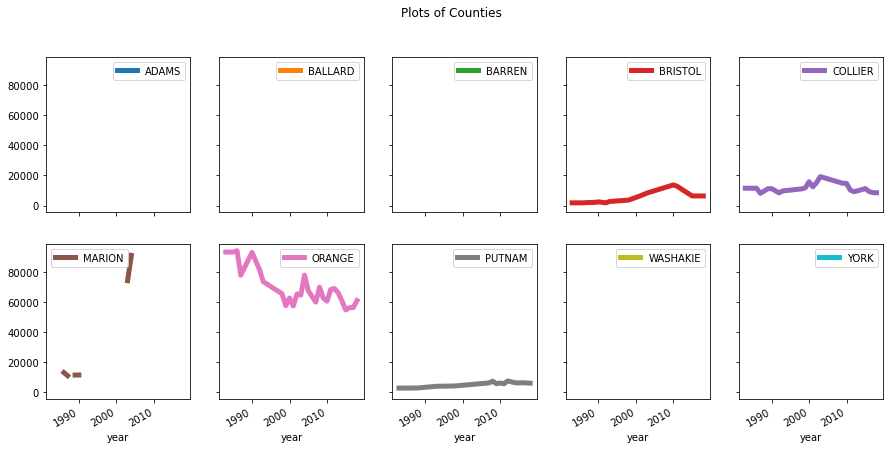

In [59]:
# plot the data
df_pivoted.plot(subplots = True, 
                layout = (2, 5),
               sharey = True,
               title = "Plots of Counties",
               linewidth = 5,
                figsize=(15,7))

# Compare anomalous data to other columns or research the facility in order to understand if data should be omitted

# Interpolate all data points that were either originally missing or you decided should be omitted (by default we use linear interpolation but for some fields such as gender that add up to another field we might take that into account- there is no wrong way to do this we just want to see how you think)

# Write data to new file 

In [ ]:
df.to_csv('cleaned.csv')

# Trash

In [13]:
# Now, let's initialize initial_missing_ay and initial_missing_dy in order to compare missingness versus later:

initial_missing_ay = df_pivoted.admissions_year.isna().sum()
initial_missing_dy = df_pivoted.discharge_year.isna().sum()

AttributeError: 'DataFrame' object has no attribute 'admissions_year'

In [ ]:
print("There were ", initial_missing_ay, " initial missing values for admissions_year. Now, there are ", df.admissions_year.isna().sum(), " missing.")
print("There were ", initial_missing_dy, " initial missing values for discharge_year. Now, there are ", df.discharge_year.isna().sum(), " missing.")

In [ ]:
def find_bounds(data):
    """
    Based on a distribution, return upper and lower bounds (3 standard deviations from the mean or more).
    """
    anomalies = []
    
    mean = data.mean()
    std = data.std()
    
    lower_limit = mean - 2 * std
    upper_limit = mean + 2 * std
    
    return lower_limit, upper_limit

print(find_bounds(df['admissions_year']))

sns.boxplot(data=df['admissions_year'])

In [ ]:
print(find_anomalies(df['discharge_year']))
sns.boxplot(data=df['discharge_year'])

In [ ]:
def findAnomalies(df, colname):
    anomalies = []
    for (county, year) in df.iteritems():
        print(year)
        
findAnomalies(df, 'admissions_year')

In [ ]:
new_df = df.loc[df['admissions_year'] < find_bounds(df['admissions_year'])[1]]

sns.boxplot(data=new_df['admissions_year'])

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

admissions_plot.plot(subplots = True, 
                layout = (2, 5),
               sharey = True,
               title = "Plots of Counties",
               linewidth = 5,
                figsize=(15,7))

In [ ]:
# returns missingness in discharge_year per county

df['missingness'] = (df.discharge_year
           .isnull()
           .groupby([df['facility_name']])
           .transform('sum')
           .astype(int))

missingness_count = (df[['county', 'missingness']]
      .drop_duplicates()
      .sort_values('missingness', 
                   ascending = False))

missingness_count

Orange, Collier, and Bristol County have the most missingness in their data with 22 missing values each. Washakie, York, and Ballard have the fewest missing values.

However, it's important to note that missingness is only counted here when the jail has non-NA counts for other columns, i.e. confined_men. If no figures were collected that year, then the dataset wouldn't have the year show up as a row in the first place. In other words, if a jail like Orange County's collects data more frequently but doesn't upload yearly admissions/discharge data each year, the table above would exagerate the missingness.